In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

To prevent the Korean language garbled problem

In [41]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [42]:
import matplotlib as mpl
plt.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

In [43]:
df = pd.read_csv('[DS]TermProject_data.csv', encoding='cp949')
df.head()

,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분
0,서울의 봄,김성수,(주)하이브미디어코프,NaN,플러스엠 엔터테인먼트,2023-11-22,개봉영화,장편,한국,2328,1.279270e+11,13128022,29336996104,2956527,드라마,12세이상관람가,일반영화
1,파묘,장재현,(주)쇼박스,NaN,(주)쇼박스,2024-02-22,개봉영화,장편,한국,2355,1.146310e+11,11860088,26825097498,2707856,미스터리,15세이상관람가,일반영화
2,범죄도시4,허명행,"주식회사 빅펀치픽쳐스,(주)홍필름,(주)비에이엔터테인먼트",NaN,"주식회사 에이비오엔터테인먼트,플러스엠 엔터테인먼트",2024-04-24,개봉영화,장편,한국,2980,4.757016e+10,5005512,9997331476,1015411,액션,15세이상관람가,일반영화
3,노량: 죽음의 바다,김한민,(주)빅스톤픽쳐스,NaN,"롯데컬처웍스(주)롯데엔터테인먼트,(주)에이스메이커무비웍스",2023-12-20,개봉영화,장편,한국,2196,4.500269e+10,4572561,9860710267,970404,사극,12세이상관람가,일반영화
4,시민덕희,박영주,"(주)씨제스엔터테인먼트,페이지원필름(주)",NaN,(주)쇼박스,2024-01-24,개봉영화,장편,한국,1272,1.611482e+10,1706676,3304172645,343519,드라마,15세이상관람가,일반영화


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   영화명      1565 non-null   object 
 1   감독       1331 non-null   object 
 2   제작사      1464 non-null   object 
 3   수입사      2 non-null      object 
 4   배급사      1565 non-null   object 
 5   개봉일      1565 non-null   object 
 6   영화유형     1565 non-null   object 
 7   영화형태     1565 non-null   object 
 8   국적       1565 non-null   object 
 9   전국 스크린수  1565 non-null   int64  
 10  전국 매출액   1565 non-null   float64
 11  전국 관객수   1565 non-null   int64  
 12  서울 매출액   1565 non-null   int64  
 13  서울 관객수   1565 non-null   int64  
 14  장르       1523 non-null   object 
 15  등급       1565 non-null   object 
 16  영화구분     1565 non-null   object 
dtypes: float64(1), int64(4), object(12)
memory usage: 208.0+ KB




---


## **Preprocessing**

### Drop data

In [45]:
df['영화유형'].value_counts()

영화유형
개봉영화    1565
Name: count, dtype: int64

In [46]:
df['국적'].value_counts()

국적
한국    1565
Name: count, dtype: int64

In [47]:
df.drop(columns=['영화명', '제작사', '수입사', '개봉일', '영화유형', '국적'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   감독       1331 non-null   object 
 1   배급사      1565 non-null   object 
 2   영화형태     1565 non-null   object 
 3   전국 스크린수  1565 non-null   int64  
 4   전국 매출액   1565 non-null   float64
 5   전국 관객수   1565 non-null   int64  
 6   서울 매출액   1565 non-null   int64  
 7   서울 관객수   1565 non-null   int64  
 8   장르       1523 non-null   object 
 9   등급       1565 non-null   object 
 10  영화구분     1565 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 134.6+ KB


### Encoding

감독 rank encoding

In [48]:
director_rank = df.groupby('감독')['전국 관객수'].mean().reset_index(name='director_rank').sort_values(by='director_rank', ascending=False)
director_rank['director_rank'] = [i+1 for i in range(director_rank.shape[0])]
director_rank

,감독,director_rank
459,장재현,1
365,이상용,2
77,김성수,3
591,허명행,4
371,이석훈,5
...,...,...
322,유수영,612
527,최경찬,613
324,유영주,614
525,천성준,615


In [49]:
# Merge '감독' data
df = pd.merge(df, director_rank, how='left')

In [50]:
df.drop('감독', axis=1, inplace=True)
df.head()

,배급사,영화형태,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분,director_rank
0,플러스엠 엔터테인먼트,장편,2328,1.279270e+11,13128022,29336996104,2956527,드라마,12세이상관람가,일반영화,3.0
1,(주)쇼박스,장편,2355,1.146310e+11,11860088,26825097498,2707856,미스터리,15세이상관람가,일반영화,1.0
2,"주식회사 에이비오엔터테인먼트,플러스엠 엔터테인먼트",장편,2980,4.757016e+10,5005512,9997331476,1015411,액션,15세이상관람가,일반영화,4.0
3,"롯데컬처웍스(주)롯데엔터테인먼트,(주)에이스메이커무비웍스",장편,2196,4.500269e+10,4572561,9860710267,970404,사극,12세이상관람가,일반영화,7.0
4,(주)쇼박스,장편,1272,1.611482e+10,1706676,3304172645,343519,드라마,15세이상관람가,일반영화,14.0


장르 rank encoding

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
C:\Users\leeminwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\leeminwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\leeminwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family '

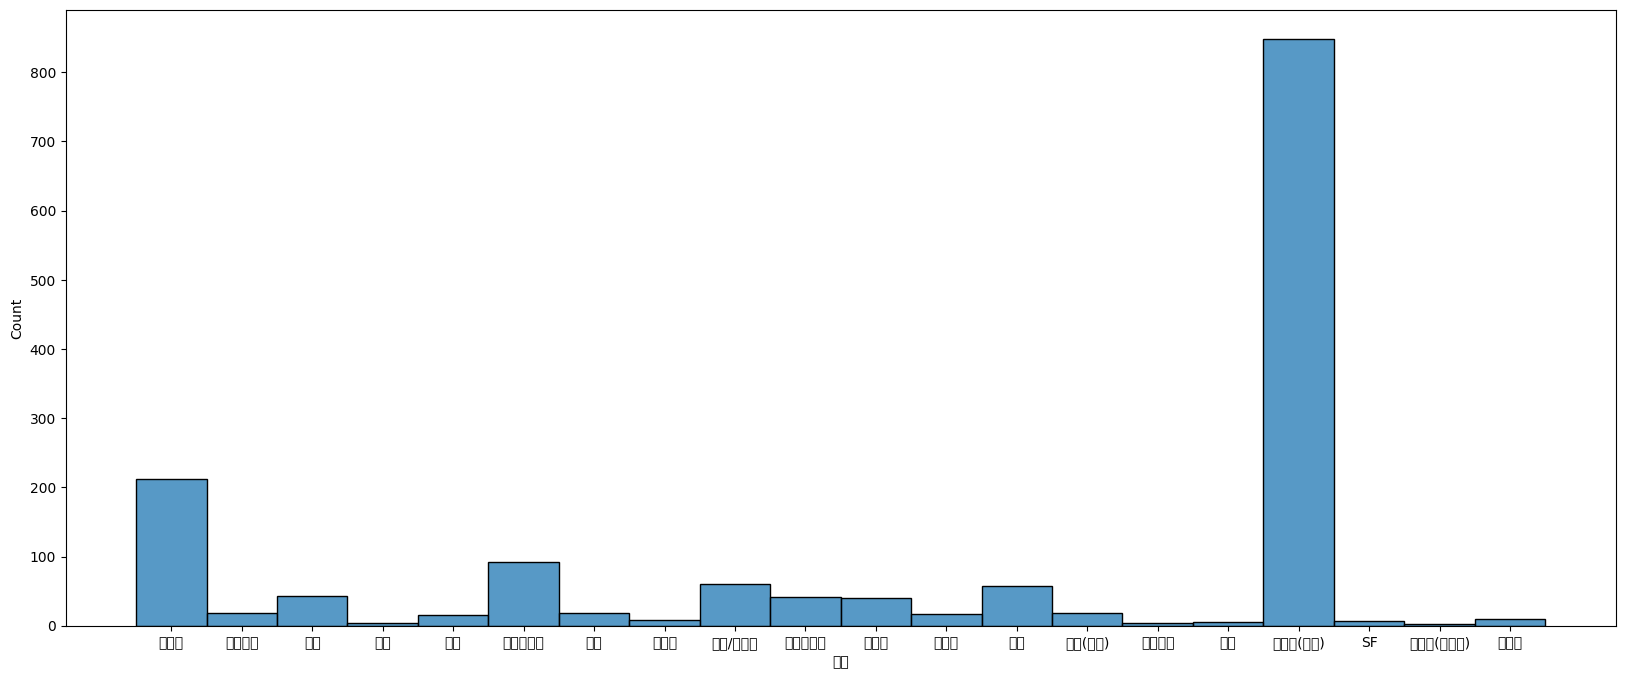

In [51]:
plt.figure(figsize=[20,8])
sns.histplot(data=df, x='장르')
plt.show()

In [52]:
genre_rank = df.groupby('장르')['전국 관객수'].mean().reset_index(name='gr_rank').sort_values(by='gr_rank', ascending=False)
genre_rank['gr_rank'] = [i+1 for i in range(genre_rank.shape[0])]
genre_rank

,장르,gr_rank
10,범죄,1
11,사극,2
16,액션,3
9,미스터리,4
19,판타지,5
18,코미디,6
14,스릴러,7
6,드라마,8
8,뮤지컬,9
4,기타,10


In [53]:
# Merge '장르' data
df = pd.merge(df, genre_rank, how='left')

In [54]:
df.drop('장르', axis=1, inplace=True)
df.head()

,배급사,영화형태,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,등급,영화구분,director_rank,gr_rank
0,플러스엠 엔터테인먼트,장편,2328,1.279270e+11,13128022,29336996104,2956527,12세이상관람가,일반영화,3.0,8.0
1,(주)쇼박스,장편,2355,1.146310e+11,11860088,26825097498,2707856,15세이상관람가,일반영화,1.0,4.0
2,"주식회사 에이비오엔터테인먼트,플러스엠 엔터테인먼트",장편,2980,4.757016e+10,5005512,9997331476,1015411,15세이상관람가,일반영화,4.0,3.0
3,"롯데컬처웍스(주)롯데엔터테인먼트,(주)에이스메이커무비웍스",장편,2196,4.500269e+10,4572561,9860710267,970404,12세이상관람가,일반영화,7.0,2.0
4,(주)쇼박스,장편,1272,1.611482e+10,1706676,3304172645,343519,15세이상관람가,일반영화,14.0,8.0


배급사 rank encoding

In [55]:
distributor_rank = df.groupby('배급사')['전국 관객수'].mean().reset_index(name='dis_rank').sort_values(by='dis_rank', ascending=False)
distributor_rank['dis_rank'] = [i+1 for i in range(distributor_rank.shape[0])]
distributor_rank

,배급사,dis_rank
193,"주식회사 에이비오엔터테인먼트,플러스엠 엔터테인먼트",1
139,"롯데컬처웍스(주)롯데엔터테인먼트,(주)에이스메이커무비웍스",2
52,(주)쇼박스,3
216,플러스엠 엔터테인먼트,4
134,다큐스토리,5
...,...,...
171,엔트리커뮤니케이션즈,216
173,영드래곤 미디어,217
151,스마일컨텐츠,218
185,유한회사 영화사 반딧불,219


In [56]:
# Merge '배급사' data
df = pd.merge(df, distributor_rank, how='left')

In [57]:
df.drop('배급사', axis=1, inplace=True)
df.head()

,영화형태,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,등급,영화구분,director_rank,gr_rank,dis_rank
0,장편,2328,1.279270e+11,13128022,29336996104,2956527,12세이상관람가,일반영화,3.0,8.0,4
1,장편,2355,1.146310e+11,11860088,26825097498,2707856,15세이상관람가,일반영화,1.0,4.0,3
2,장편,2980,4.757016e+10,5005512,9997331476,1015411,15세이상관람가,일반영화,4.0,3.0,1
3,장편,2196,4.500269e+10,4572561,9860710267,970404,12세이상관람가,일반영화,7.0,2.0,2
4,장편,1272,1.611482e+10,1706676,3304172645,343519,15세이상관람가,일반영화,14.0,8.0,3


One-Hot-Encoding

In [58]:
df['영화형태'].value_counts()

영화형태
장편      1557
옴니버스       8
Name: count, dtype: int64

In [59]:
df['영화구분'].value_counts()

영화구분
일반영화       1247
독립/예술영화     318
Name: count, dtype: int64

In [60]:
df['등급'].value_counts()

등급
청소년관람불가     960
12세이상관람가    242
15세이상관람가    193
전체관람가       170
Name: count, dtype: int64

In [61]:
df = pd.get_dummies(data=df, columns=['영화형태', '영화구분', '등급'], dtype=int)

In [62]:
df.head()

,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,director_rank,gr_rank,dis_rank,영화형태_옴니버스,영화형태_장편,영화구분_독립/예술영화,영화구분_일반영화,등급_12세이상관람가,등급_15세이상관람가,등급_전체관람가,등급_청소년관람불가
0,2328,1.279270e+11,13128022,29336996104,2956527,3.0,8.0,4,0,1,0,1,1,0,0,0
1,2355,1.146310e+11,11860088,26825097498,2707856,1.0,4.0,3,0,1,0,1,0,1,0,0
2,2980,4.757016e+10,5005512,9997331476,1015411,4.0,3.0,1,0,1,0,1,0,1,0,0
3,2196,4.500269e+10,4572561,9860710267,970404,7.0,2.0,2,0,1,0,1,1,0,0,0
4,1272,1.611482e+10,1706676,3304172645,343519,14.0,8.0,3,0,1,0,1,0,1,0,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   전국 스크린수        1565 non-null   int64  
 1   전국 매출액         1565 non-null   float64
 2   전국 관객수         1565 non-null   int64  
 3   서울 매출액         1565 non-null   int64  
 4   서울 관객수         1565 non-null   int64  
 5   director_rank  1331 non-null   float64
 6   gr_rank        1523 non-null   float64
 7   dis_rank       1565 non-null   int64  
 8   영화형태_옴니버스      1565 non-null   int32  
 9   영화형태_장편        1565 non-null   int32  
 10  영화구분_독립/예술영화   1565 non-null   int32  
 11  영화구분_일반영화      1565 non-null   int32  
 12  등급_12세이상관람가    1565 non-null   int32  
 13  등급_15세이상관람가    1565 non-null   int32  
 14  등급_전체관람가       1565 non-null   int32  
 15  등급_청소년관람불가     1565 non-null   int32  
dtypes: float64(3), int32(8), int64(5)
memory usage: 146.8 KB


Drop missing values

In [64]:
df.isna().sum()

전국 스크린수            0
전국 매출액             0
전국 관객수             0
서울 매출액             0
서울 관객수             0
director_rank    234
gr_rank           42
dis_rank           0
영화형태_옴니버스          0
영화형태_장편            0
영화구분_독립/예술영화       0
영화구분_일반영화          0
등급_12세이상관람가        0
등급_15세이상관람가        0
등급_전체관람가           0
등급_청소년관람불가         0
dtype: int64

In [65]:
df.dropna(axis=0, inplace=True)

df.head()

,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,director_rank,gr_rank,dis_rank,영화형태_옴니버스,영화형태_장편,영화구분_독립/예술영화,영화구분_일반영화,등급_12세이상관람가,등급_15세이상관람가,등급_전체관람가,등급_청소년관람불가
0,2328,1.279270e+11,13128022,29336996104,2956527,3.0,8.0,4,0,1,0,1,1,0,0,0
1,2355,1.146310e+11,11860088,26825097498,2707856,1.0,4.0,3,0,1,0,1,0,1,0,0
2,2980,4.757016e+10,5005512,9997331476,1015411,4.0,3.0,1,0,1,0,1,0,1,0,0
3,2196,4.500269e+10,4572561,9860710267,970404,7.0,2.0,2,0,1,0,1,1,0,0,0
4,1272,1.611482e+10,1706676,3304172645,343519,14.0,8.0,3,0,1,0,1,0,1,0,0


In [66]:
df.isna().sum()

전국 스크린수          0
전국 매출액           0
전국 관객수           0
서울 매출액           0
서울 관객수           0
director_rank    0
gr_rank          0
dis_rank         0
영화형태_옴니버스        0
영화형태_장편          0
영화구분_독립/예술영화     0
영화구분_일반영화        0
등급_12세이상관람가      0
등급_15세이상관람가      0
등급_전체관람가         0
등급_청소년관람불가       0
dtype: int64

In [67]:
df.describe()
df.to_csv("C:/Users/leeminwoo/Desktop/데과팀플/df_preprocessing.csv")



---


## **Correlation** (Visualization)

genre & 전국 관객수

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

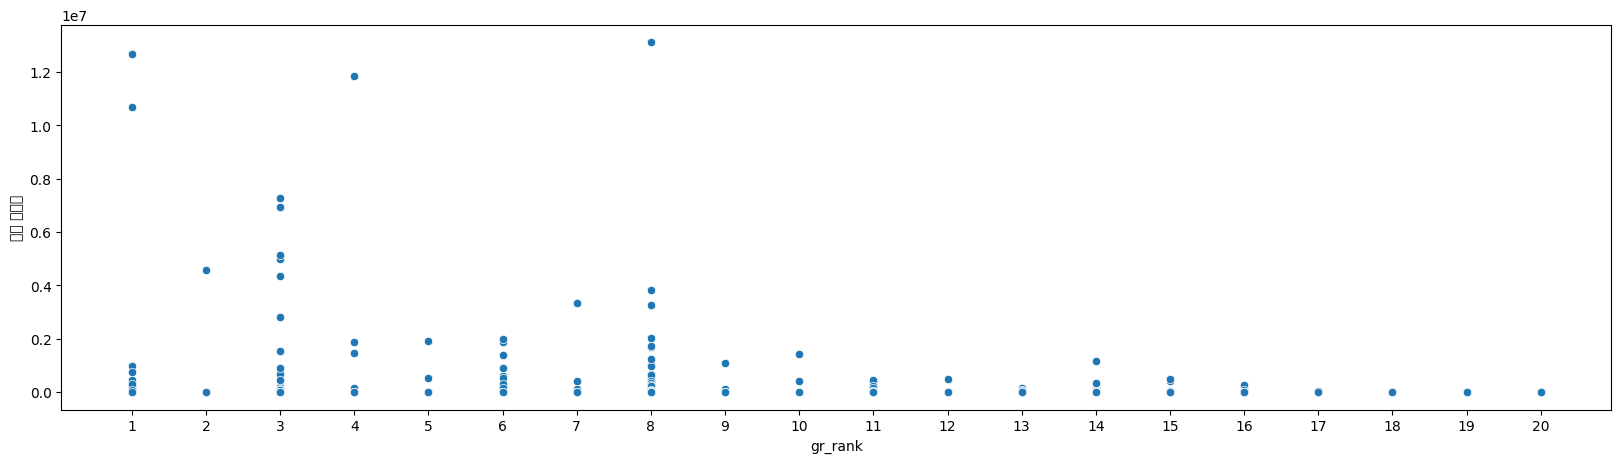

In [68]:
plt.figure(figsize=[20,5])
sns.scatterplot(data=df, x='gr_rank', y='전국 관객수')
plt.xticks(np.arange(1,21))
plt.show()

Heatmap

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
C:\Users\leeminwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.draw()
C:\Users\leeminwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.draw()
C:\Users\leeminwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.draw()
C:\Users\leeminwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\

<Axes: >

findfont: Font family 'NanumGothic' not found.
C:\Users\leeminwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\leeminwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  func(*args, **kwargs)
C:\Users\leeminwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args, **kwargs)
C:\Users\leeminwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-pa

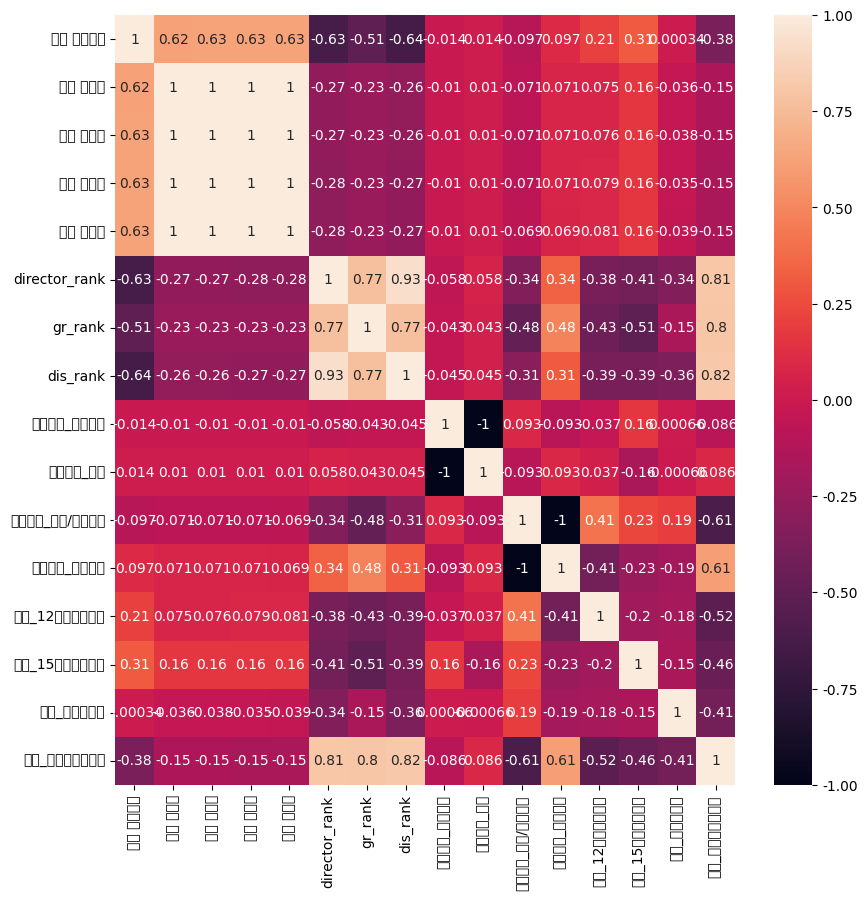

In [69]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(), annot=True)